In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [10]:
df = pd.read_csv("./Churn_Modelling.csv")

In [11]:
df.shape

(10000, 14)

In [15]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


EDA

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.describe(include=['O'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [16]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.shape[0] == df.CustomerId.nunique()

True

In [18]:
print(df['Geography'].value_counts())
print(df['Gender'].value_counts())
print(df['HasCrCard'].value_counts())
print(df['IsActiveMember'].value_counts())


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
Exited
0    7963
1    2037
Name: count, dtype: int64


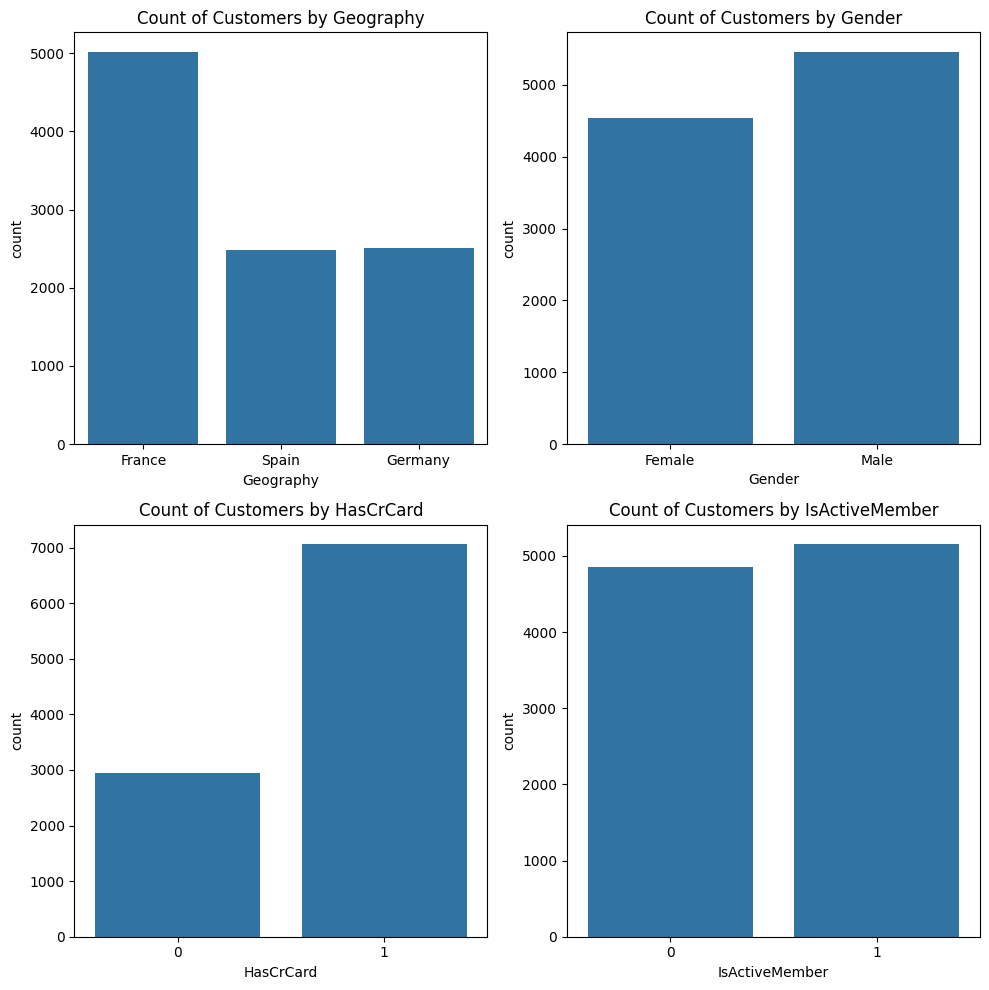

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot(x='Geography', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Count of Customers by Geography')

sns.countplot(x='Gender', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Count of Customers by Gender')

sns.countplot(x='HasCrCard', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Count of Customers by HasCrCard')

sns.countplot(x='IsActiveMember', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Count of Customers by IsActiveMember')

plt.tight_layout()
plt.show()

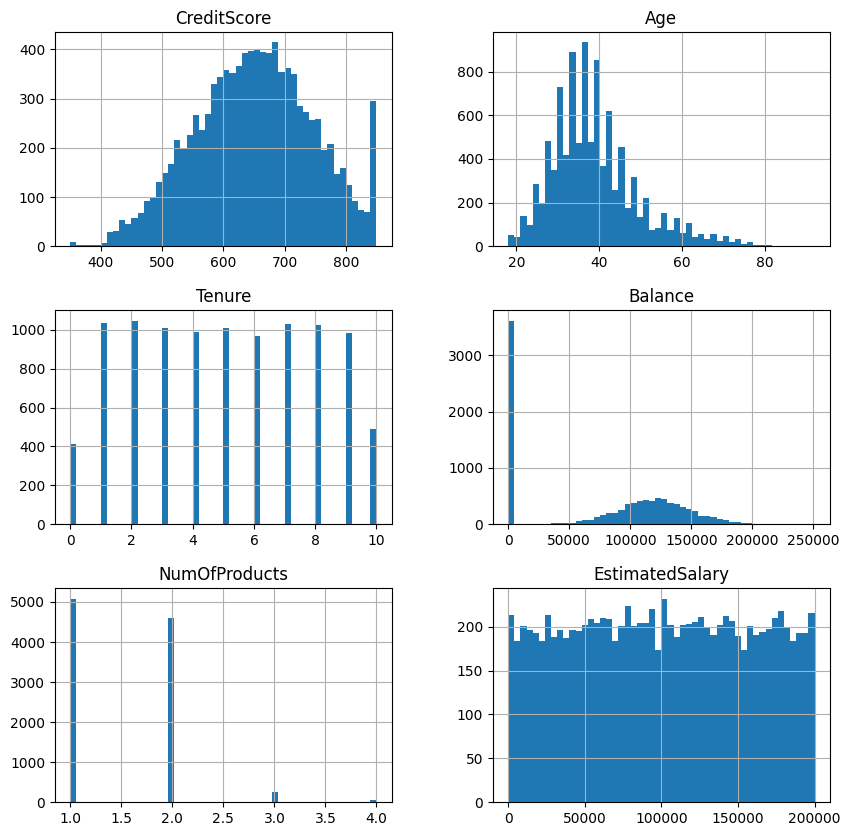

In [43]:
df.hist(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
        'EstimatedSalary'], bins=50, figsize=(10, 10))
plt.show()

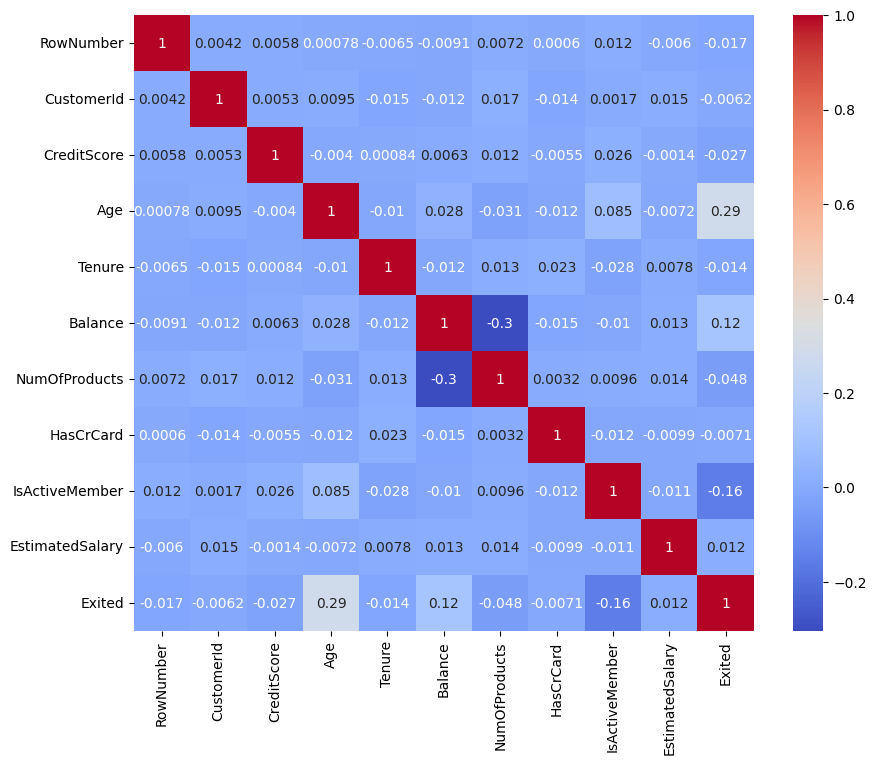

In [33]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

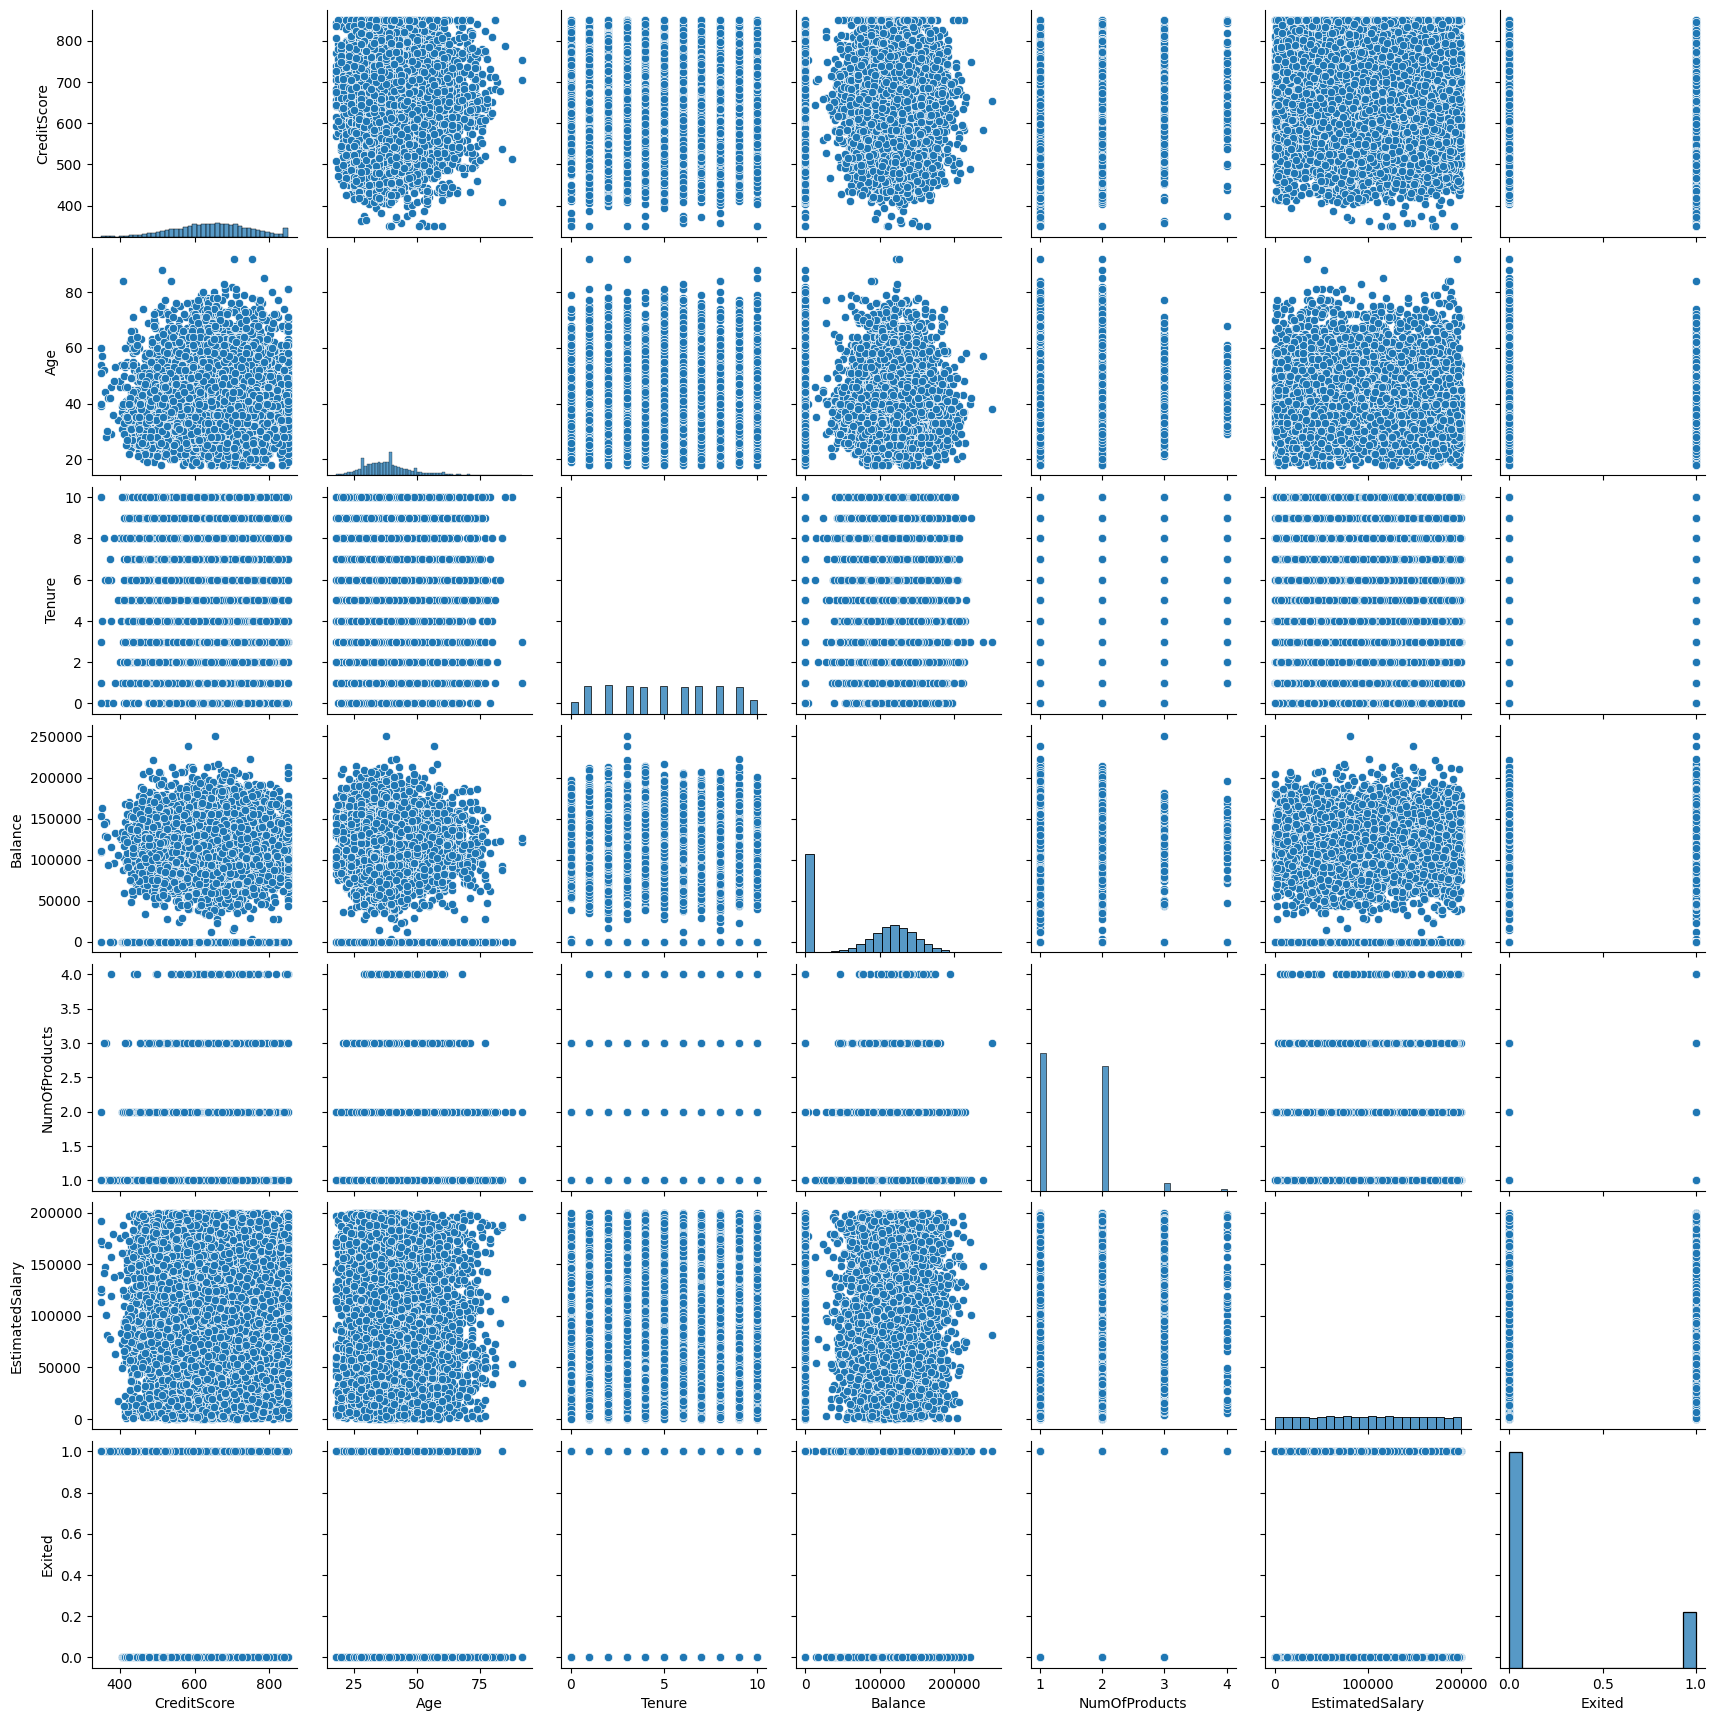

In [32]:
sns.pairplot(df[['CreditScore', 'Age', 'Tenure', 'Balance',
             'NumOfProducts', 'EstimatedSalary', 'Exited']])
plt.show()

In [45]:
df_encoded = df.copy()

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['Geography'] = le.fit_transform(df_encoded['Geography'])
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])